<a href="https://colab.research.google.com/github/Untick/IrisID_gr2/blob/Gaidash-Alexey-folder/Gaidash%20Aleksey/%D0%94%D0%BE%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%92%D1%8B%D0%B2%D0%BE%D0%B4%20%D0%BC%D0%B0%D0%BA%D1%82%D1%80%D0%B8%D1%86%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

# Загрузка датасета из облака
import gdown
gdown.download('https://drive.google.com/uc?id=1CUe9HZAsGQPCqySZX7zuyJDiS3fqpyBc&authuser', None, quiet=True)

'1920x1080.zip'

In [ ]:
# Распаковываем архив Iris_ID.zip в папку Iris_ID
!unzip -q 1920x1080.zip

In [ ]:
# импортируем модули
import os;
import shutil;
from PIL import Image;
import numpy as np;
from tensorflow.keras import utils;
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import random

In [ ]:
# подготовим метки
base_path = '/content/1920x1080';
dataset_path = 'dataset';
labels = [];

for base_dir in os.listdir(base_path):
  for inner_dir in os.listdir(base_path + '/' + base_dir):
    for i_d in os.listdir(base_path + '/' + base_dir + '/' + inner_dir):
      if i_d == 'full':
        for im_name in os.listdir(base_path + '/' + base_dir + '/' + inner_dir + '/' + i_d):
          splited = im_name.split('_');
          name = splited[0] + splited[1];
          dir = dataset_path + '/' + name;

          if os.path.exists(dir) == False:
            os.makedirs(dir);

          labels.append(name);
          shutil.move(base_path + '/' + base_dir + '/' + inner_dir + '/' + i_d + '/' + im_name, dir);

print(labels);

['06right', '06right', '06right', '06right', '06right', '06right', '06right', '06right', '06left', '06left', '06left', '06left', '06left', '06left', '06left', '06left', '17right', '17right', '17right', '17right', '17right', '17right', '17right', '17right', '17left', '17left', '17left', '17left', '17left', '17left', '17left', '17left', '20right', '20right', '20right', '20right', '20right', '20right', '20right', '20right', '20left', '20left', '20left', '20left', '20left', '20left', '20left', '20left', '11right', '11right', '11right', '11right', '11right', '11right', '11right', '11right', '11left', '11left', '11left', '11left', '11left', '11left', '11left', '11left', '12right', '12right', '12right', '12right', '12right', '12right', '12right', '12right', '12left', '12left', '12left', '12left', '12left', '12left', '12left', '12left', '22right', '22right', '22right', '22right', '22right', '22right', '22right', '22right', '22left', '22left', '22left', '22left', '22left', '22left', '22left', '

In [ ]:
# подготовим датасет
x_train = [];
y_train = [];
NUM_CLASSES = 0;
IMG_WIDTH = 100;
IMG_HEIGHT = 100;

Dirs = os.listdir(dataset_path);

for dir in Dirs:
  for file in os.listdir(dataset_path + '/' + dir):
    im = Image.open(dataset_path + '/' + dir + '/' + file);
    im = im.resize((IMG_WIDTH, IMG_HEIGHT))
    im = im.convert("RGB")

    np_arr = np.array(im);
    x_train.append(np_arr);
    y_train.append(NUM_CLASSES);

  NUM_CLASSES += 1;

x_train = np.array(x_train);
x_train = x_train.reshape(x_train.shape[0], 100, 100, 3);

# x_train = x_train / 255.;

# отберём 10% на валидационную выборку
index = int(len(x_train) / 10);
x_val = x_train[-index:];

x_val = np.array(x_val);

y_val = y_train[-index:];

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_train = np.array(y_train);

y_val = utils.to_categorical(y_val, NUM_CLASSES);
y_val = np.array(y_val);

rand = list(zip(x_val, y_val))
random.shuffle(rand)
x_val, y_val = zip(*rand)

x_val = np.array(x_val)
y_val = np.array(y_val)

print('Размер массива x_train', x_train.shape);
print('Размер массива y_train', y_train.shape);
print('Размер массива x_train', x_val.shape);
print('Размер массива y_train', y_val.shape);

Размер массива x_train (400, 100, 100, 3)
Размер массива y_train (400, 50)
Размер массива x_train (40, 100, 100, 3)
Размер массива y_train (40, 50)


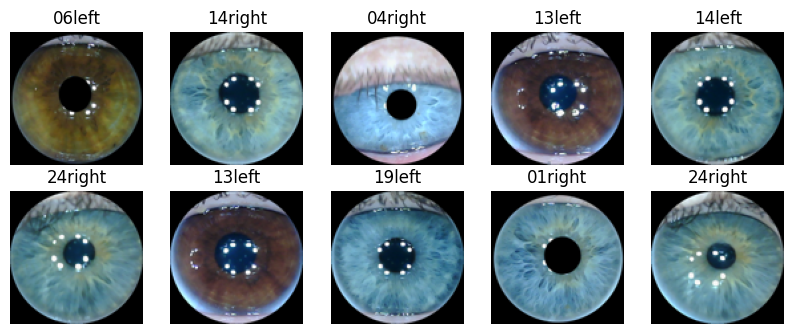

In [ ]:
fig = plt.figure(figsize=(10,10))

for i in range(10):
    n = np.random.randint(0 , x_train.shape[0])
    img = x_train[n];
    ax = fig.add_subplot(5, 5, i+1);
    label = Dirs[np.argmax(y_train[n])];
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show();


In [ ]:
# загрузим сохранённую модель
import gdown
gdown.download('https://drive.google.com/uc?id=1JuKEgGlUGbxcJTHoW89w9jqEXXJYqcht&authuser=0', None, quiet=True)

'ident.h5'

In [ ]:
model = load_model('/content/ident.h5');

In [ ]:
from tensorflow.keras.layers import Dense

model.summary();
model.pop();
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 512)     14336     
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 512)    2048      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 256)       1179904   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 256)      0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
from tensorflow.keras.optimizers import Adam

# Компиляция модели
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model_hystory = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=50, epochs=25, verbose=1);

Epoch 1/25
8/8 [==============================] - 139s 17s/step - loss: 8.4020 - accuracy: 0.0925 - val_loss: 8.3570 - val_accuracy: 0.0000e+00
Epoch 2/25
8/8 [==============================] - 128s 16s/step - loss: 2.2312 - accuracy: 0.4400 - val_loss: 8.0730 - val_accuracy: 0.1750
Epoch 3/25
8/8 [==============================] - 133s 17s/step - loss: 0.8470 - accuracy: 0.7800 - val_loss: 5.9418 - val_accuracy: 0.1500
Epoch 4/25
8/8 [==============================] - 129s 16s/step - loss: 0.3424 - accuracy: 0.9125 - val_loss: 4.2994 - val_accuracy: 0.3250
Epoch 5/25
8/8 [==============================] - 128s 16s/step - loss: 0.1196 - accuracy: 0.9925 - val_loss: 3.2096 - val_accuracy: 0.2750
Epoch 6/25
8/8 [==============================] - 129s 16s/step - loss: 0.0554 - accuracy: 1.0000 - val_loss: 2.1921 - val_accuracy: 0.4000
Epoch 7/25
8/8 [==============================] - 134s 17s/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 1.2692 - val_accuracy: 0.6750
Epoch 8/25
8/8 [

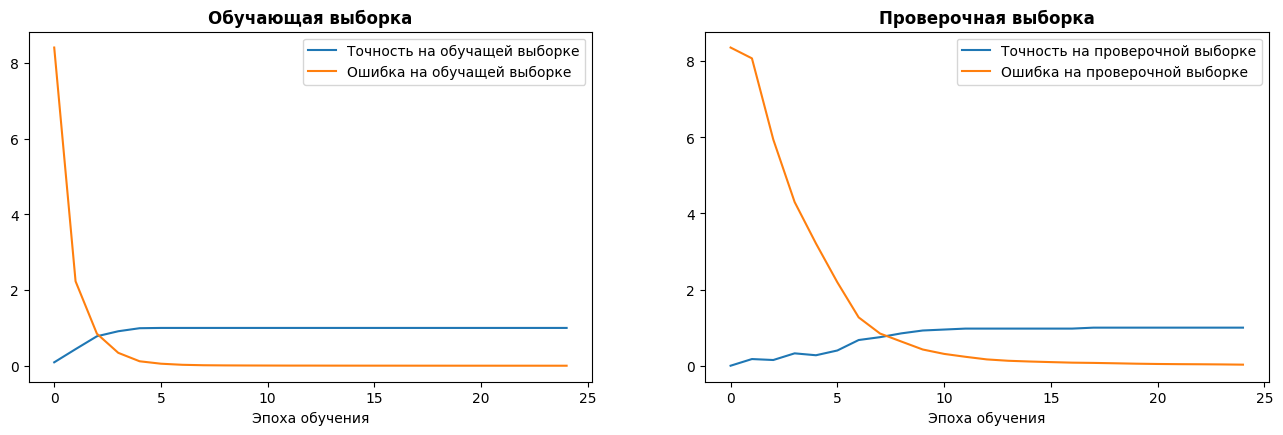

In [ ]:
plt.figure(figsize=(16, 10));

plt.subplot(2, 2, 1);
plt.title('Обучающая выборка', fontweight='bold');
plt.plot(model_hystory.history['accuracy'], label='Точность на обучащей выборке');
plt.plot(model_hystory.history['loss'], label='Ошибка на обучащей выборке');
plt.xlabel('Эпоха обучения');
plt.legend()

plt.subplot(2, 2, 2);
plt.title('Проверочная выборка', fontweight='bold');
plt.plot(model_hystory.history['val_accuracy'], label='Точность на проверочной выборке');
plt.plot(model_hystory.history['val_loss'], label='Ошибка на проверочной выборке');
plt.xlabel('Эпоха обучения');
plt.legend();

plt.show();

13/13 [==============================] - 34s 3s/step


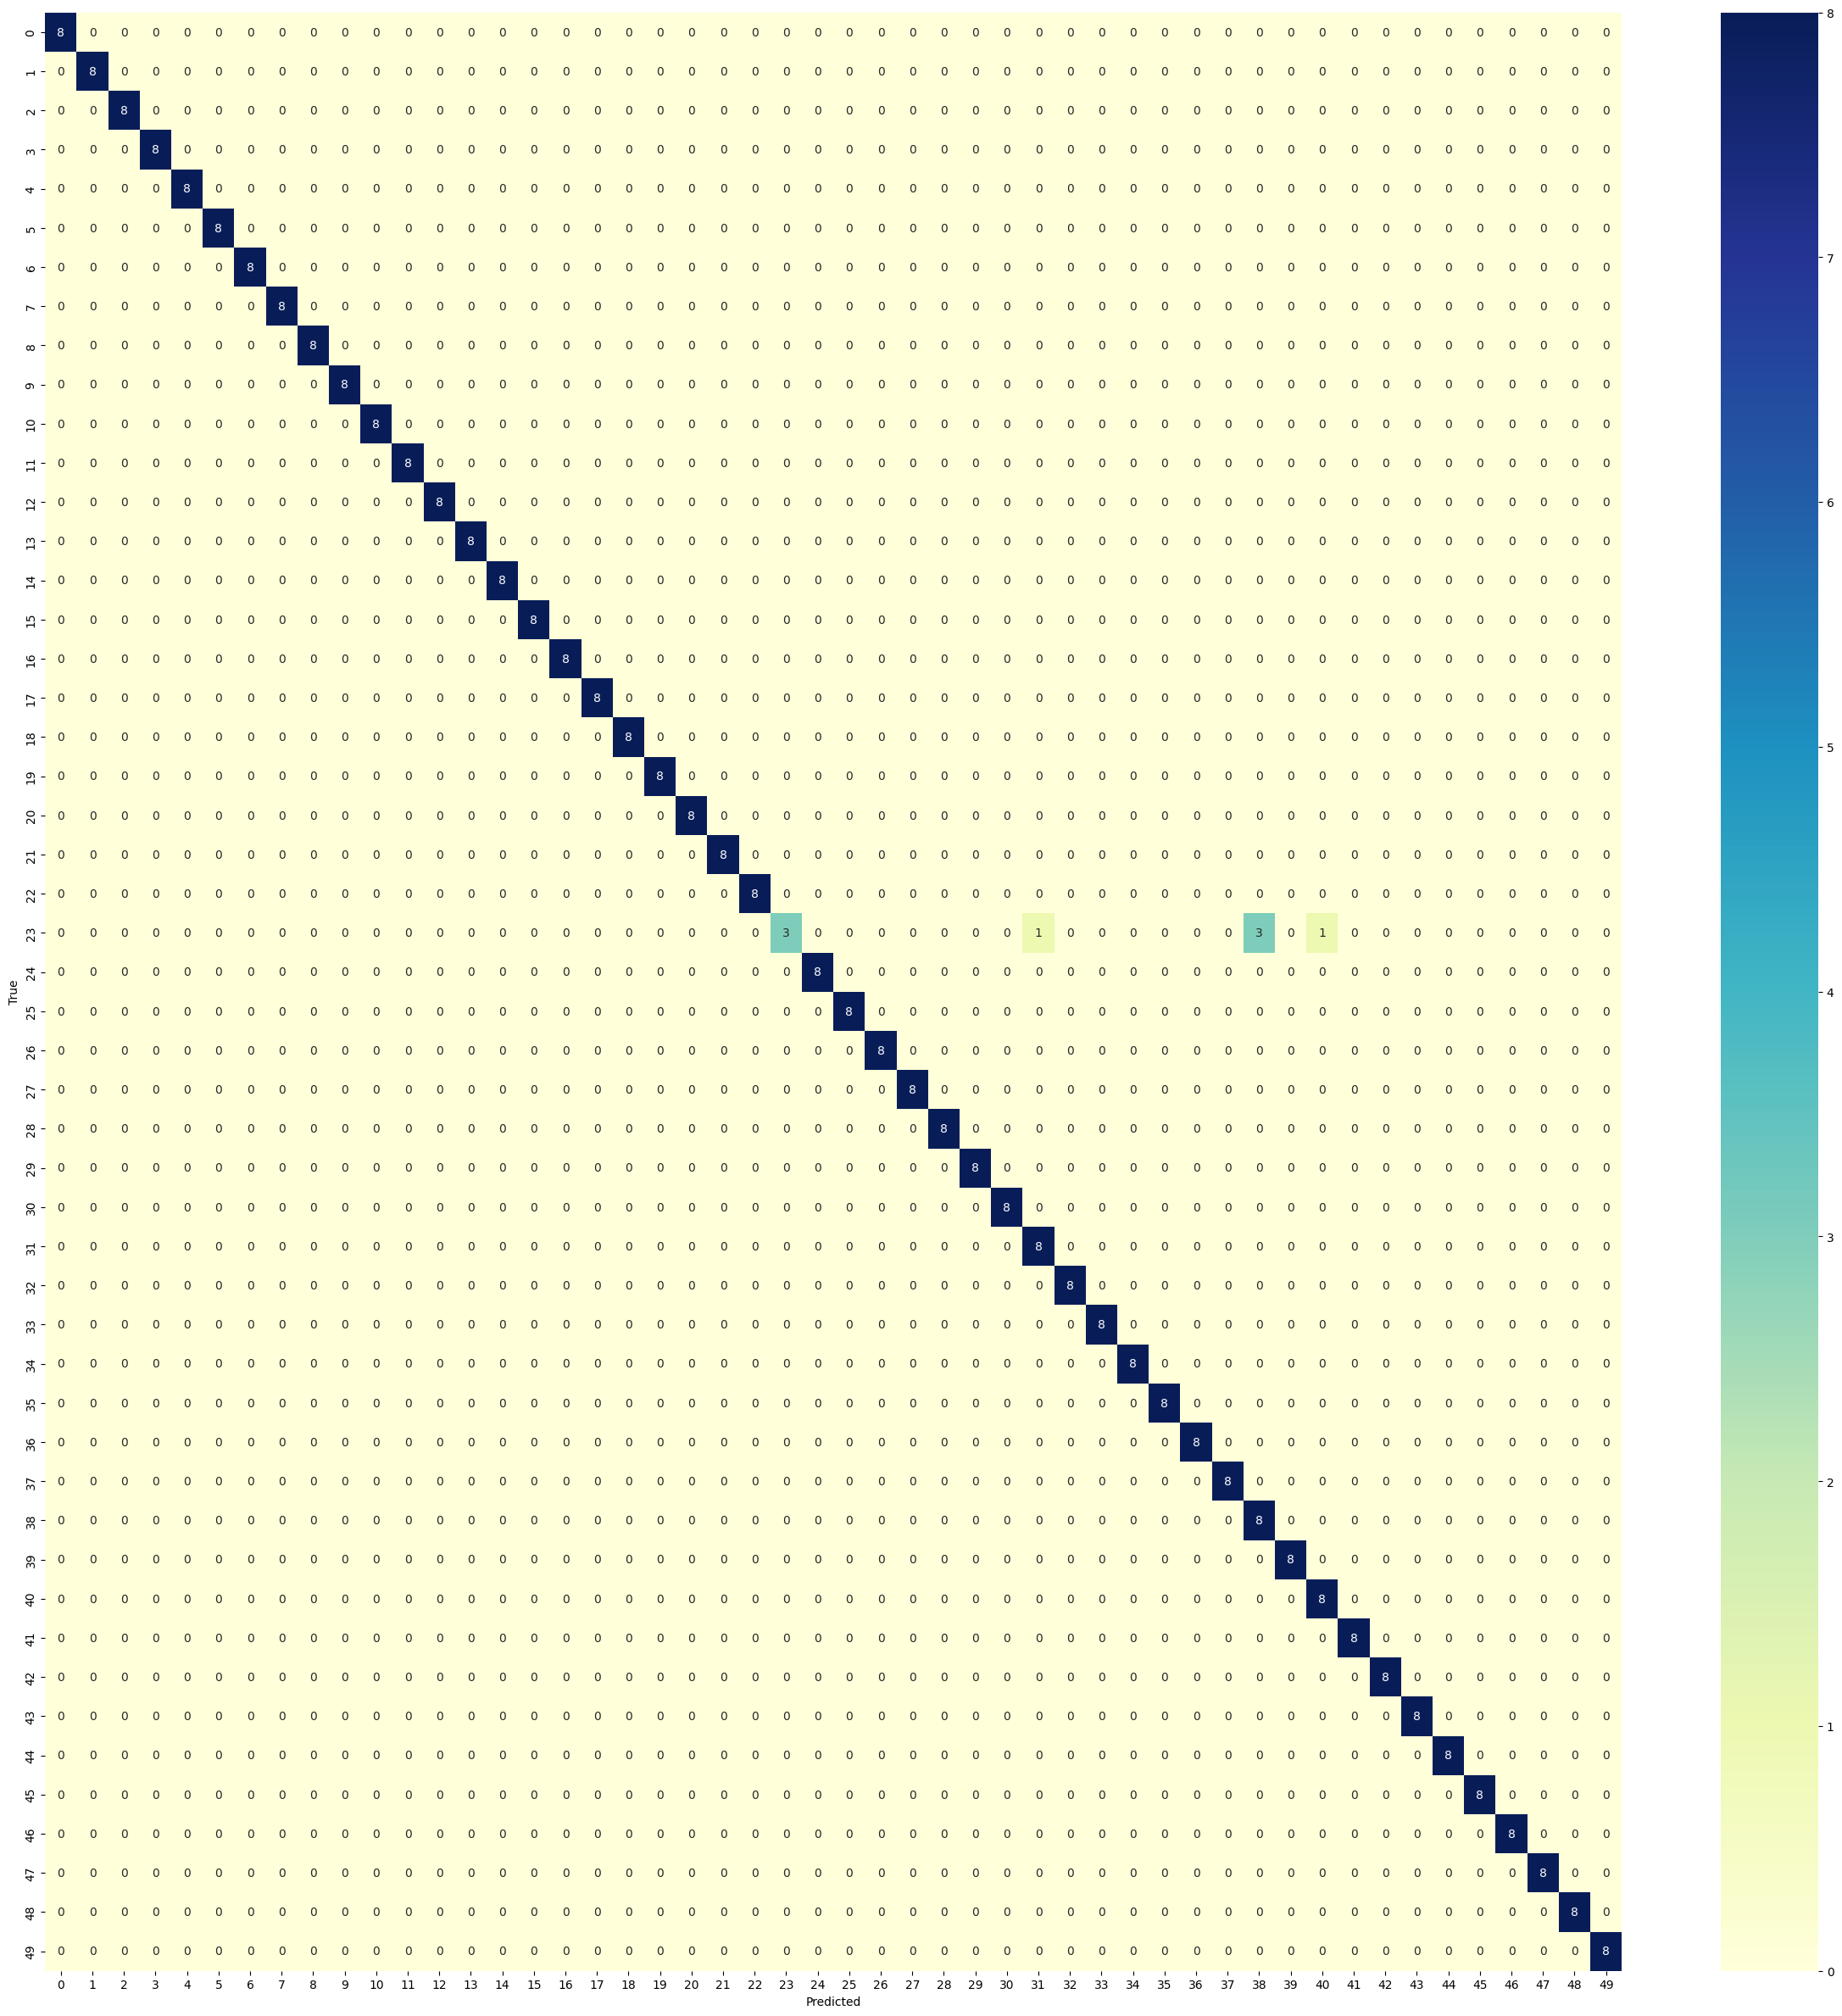

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf

y_predict = model.predict(x_train);
y_test_classes = [tf.argmax(y_train[i]).numpy() for i in range(len(y_train))]
y_predict_classes = [tf.argmax(y_predict[i]).numpy() for i in range(len(y_predict))]

plt.figure(figsize=(30,30))
confusion_mtx = confusion_matrix(y_test_classes, y_predict_classes)
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()